### Question 2: Asymmetric quantum well
The system we want to work with here is a finite segment of the real line from $x = 0$ to $x = L$ with a variable potential $V(x) = \frac{ax}{L}$ where $a$ is a constant with units of energy. In order to impose boundary conditions for the wavefunction $\psi$ such that $\psi(0) = \psi(L) = 0$ we also demand that this potential blows up at the boundaries. We can then give the Fourier representation of the wavefunction as follows:
$$ 
\psi(x) = \sum_{n=1}^{\infty}\psi_n \mathrm{sin}\frac{\pi n x}{L}
$$
where $\psi_1, \psi_2,...$ are Fourier coefficients. These coefficients, in particular, are the components of the eigenvectors of the following eigenvalue equation for the Hamiltonian operator (obsevable of this measurement is energy):
$$
\mathbf{H \psi} = E\mathbf{\psi}\\
\mathbf{\psi} = (\psi_1, \psi_2,...)
$$
$E$ being the energy eigenvalue. $\mathbf{H}$ is the infinite dimensional matrix representation of the Hamiltonitan operator $\hat H = -\frac{\hbar^2}{2 M}\frac{\mathrm{d}^2}{\mathrm{d}x^2} + V(x)$. Different eigenvalues $E$ correspond to different discrete energy levels the particle can be observed in.

It can be shown that the matrix elements of $\mathbf{H}$ are given by:
$$
H_{mn} = \frac{2}{L}\int_0^L \mathrm{sin}\frac{\pi m x}{L}\big[ -\frac{\hbar^2}{2 M}\frac{\mathrm{d}^2}{\mathrm{d}x^2} + V(x) \big]\mathrm{sin}\frac{\pi n x}{L} \\
       = \frac{2}{L}\int_0^L \mathrm{sin}\frac{\pi m x}{L}\mathrm{sin}\frac{\pi n x}{L}\big[ \frac{\hbar^2}{2 M}(\frac{\pi n}{L})^2 + V(x) \big]
$$
The second line comes from acting the Hamiltonian operator on $\mathrm{sin}\frac{\pi n x}{L}$.

The following few blocks of code is to evaluate $H_{mn}$ for arbitrary integers $m,n$ (row and column of $\mathbf{H}$, respectively) with $L = 5\times 10^{-10} m$, $a = 10\ \mathrm{eV}$ for an electron whose mass and charge are $M = 9.1094\times 10^{-31}\ \mathrm{kg}$, $\mathrm{e} = 1.6022 \times 10^{-19} \ \mathrm{C}$, respectively. In SI units, $a = 1.6022\times 10^{-19} \ \mathrm{J}$. 

In [2]:
#Q2 
#Code for end of Newman 6.9 b)
#for H_mn
#define constants
M = 9.1094e-31 #kg (mass of electron)
L = 5e-10 #m (Length of well)
from scipy.constants import e #electron charge
a = 10*e #J (energy constant in potential)
from scipy.constants import hbar
#define assymetric 1D potential 
def V(x):
    """
    Input:
    x [float] : position of particle in well
    Output:
    V(x) [float] : potential at position x
    """
    return a*x/L

In [3]:
#define a function for computing the element of H in the mth row nth col
#use Gauss quadrature for numerical integration
from gaussxw import gaussxwab
import numpy as np
#import some particular numpy 
#atributes to make code loop nicer
#without np. everywhere
from numpy import pi, sin

#define integrand function for H
def Integrand(x,m,n):
    """
    Inputs:
    x [float] : position of particle in well
    m [integer] : row index of Hamiltonian (>=1)
    n [integer] : column index of Hamiltonian (>=1)
    Output:
    Integrand(x, m, n) [float] : The value of the integrand in the
    integral that defines elements of the Hamiltonian
    """
    out = (2/L)*sin(pi*m*x/L)*sin(pi*n*x/L)*\
    (hbar**2/(2*M)*(pi*n/L)**2 + V(x))
    return out
    
#define a function for H_{mn}
def H(m,n):
    """
    Inputs:
    m [integer] : row index of Hamiltonian (>=1)
    n [integer] : column index of Hamiltonian (>=1)
    Output:
    H(m,n) [float] : the element of the Hamiltonian for an
    electron in the assymetric well with potential given by V(x)
    above, in the mth row, nth column.
    """
    N = 100 #steps for Gaussian quadrature. 
    #get points and weights for integration from 0 to L
    xp, wp = gaussxwab(N, 0, L) 

    # Perform the integration
    s = 0.0
    for k in range(N):
        s += wp[k]*Integrand(xp[k],m,n)
    return s 

## Part c) from Newman 6.9
As mentioned in the intial preamble, $\mathbf{H}$ is an infinite dimensional matrix. So, we can'y calculate all of its eigenvalues in practice, but we can calculate the first 10x10 block of $\mathbf{H}$ and approximate the first ten eigenvalues by calculating the eigenvalues of this block. Newman tell's us the value should be 5.84 eV.

In [13]:
#let's get the first 10x10 block of H
Ham_10 = np.empty([10,10])#preallocate empty 10x10 array
#imbedded for-loop to fill entries using above function
for i in range(1,10+1):
    for j in range(1,10+1):
        Ham_10[i-1,j-1] = H(i,j)


In [5]:
#eigh returns eigenvalues and eigenvectors
#of Hermitian matrices. H is of course Hermitian
#because Quantum Mechanics
from numpy.linalg import eigh
#get eigenvalues and eigenvectors
eigenvals_10, eigenvects_10 = eigh(Ham_10)
eigenvals_10_eV = eigenvals_10/ e #convert to units of eV
ground_state_E_10 = eigenvals_10_eV[0] 
#^ array index ought to be 1 less than algebraic index.
#ground state is n=1 so array index is 0.

In [26]:
print('For 10x10 block...')
print('Ground state energy eigenvalue estimate is: {0:.7f}'.\
      format(ground_state_E_10)) 
theory = 5.84
diff = abs(ground_state_E_10 - 5.84)
print(\
'The magnitude of diference between theory value is {0:.7f}'\
     .format(diff))
print('This is {0:.7f}% of theoretical value of 5.84eV.'\
     .format(100*diff/theory))

For 10x10 block...
Ground state energy eigenvalue estimate is: 5.8363731
The magnitude of diference between theory value is 0.0036269
This is 0.0621041% of theoretical value of 5.84eV.


Yay! The ground state came out to be ~5.84eV, as expected. Now let's do the same method of approximation but for a 100x100 block.

In [7]:
#part c
#let's get the first 100x100 block of H
Ham_100 = np.empty([100,100])
for i in range(1,100+1):
    for j in range(1,100+1):
        Ham_100[i-1,j-1] = H(i,j)

In [8]:
eigenvals_100, eigenvects_100 = eigh(Ham_100)
eigenvals_100_eV = eigenvals_100/ e #convert to units of eV
ground_state_E_100 = eigenvals_100_eV[0]

In [37]:
print('For 100x100 block...')
print('Ground state energy eigenvalue estimate is: {0:.7f}'.\
      format(ground_state_E_100)) 
theory = 5.84
diff1 = abs(ground_state_E_100 - 5.84)
print(\
'The magnitude of diference between theory value is {0:.7f}'\
     .format(diff1))
print('This is {0:.7f}% of theoretical value of 5.84eV.'\
     .format(100*diff1/theory))
print(\
'Percent error for 100x100 is {0:.3e} higher than for 10x10.'\
     .format(100*diff1/theory - 100*diff/theory))
diff_est = eigenvals_10_eV[0] - eigenvals_100_eV[0]
print(\
'Diff between 10x10 and 100x100 approximation is: {0:.7e}'\
     .format(diff_est))

For 100x100 block...
Ground state energy eigenvalue estimate is: 5.8363727
The magnitude of diference between theory value is 0.0036273
This is 0.0621109% of theoretical value of 5.84eV.
Percent error for 100x100 is 6.210e-02 higher than for 10x10.
Diff between 10x10 and 100x100 approximation is: 4.0067710e-07


Still quite close, but our % error is oddly slightly higher for the 100x100 case! But negligbly so, I'd say.

In [11]:
#6.9 part e) in Newman
#define a function for the wavefucntion psi(x) for this
#particle in this potential well
def psi(x, m):
    """
    Inputs:
    x [float] : position of particle
    along the real line
    m [integer] : integer greater than or equal to 1
    denoting energy level of particle
    """
    #the eigenvector for mth energy level is
    #the m-1 element in eigenvects_100 b/c of
    #algebraic vs python indexing
    the_vector = eigenvects_100[m-1] 
    wave = 0.0
    for n in range(1,len(the_vector)+1):
        wave += the_vector[n-1]*sin(pi*n*x/L)
    return wave

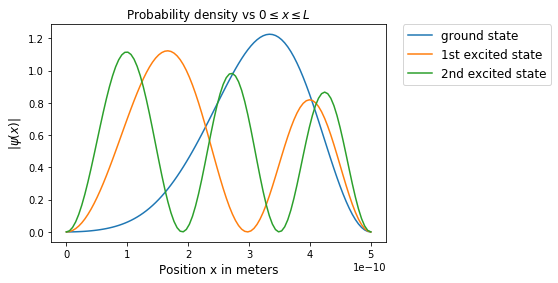

In [62]:
#a range of positions between 0 and L
x = np.linspace(0,L,100)
#wave functions for energy
#levels 1, 2, 3
psi1 = psi(x,1)
psi2 = psi(x,2)
psi3 = psi(x,3)
#corresponding probability densities
dens1 = psi1**2
dens2 = psi2**2
dens3 = psi3**2

#plot probability densities
font = 12
import matplotlib.pyplot as plt
plt.figure()
plt.title('Probability density vs $0\leq x \leq L$',
          fontsize = font)
plt.xlabel('Position x in meters',fontsize = font)
plt.ylabel('$|\psi(x)|$', fontsize = font)
plt.plot(x,dens1, label = 'ground state')
plt.plot(x,dens2, label = '1st excited state')
plt.plot(x,dens3, label = '2nd excited state')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, \
           borderaxespad=0., fontsize = font)


For some $x$ the probability amplitudes exceed 1! This is a clear indication that the wavefunctions aren't normalized. Let's now do this and plot again. The reason these weren't normalized is because previously we didn't pay any attention to the 'length'(modulus) of our eigenvectors, which ought to be normalized to one for a valid wavefunction. Thus, the manual normalization was required after computing the probility amplitudes. I could of course go back and normalize the eigenvectors and pretend like this didn't crop up,but I figured it would be more transparent to explain by this conrete example of what happens when you don't normalize eigenvectors. The normalized plot is below.

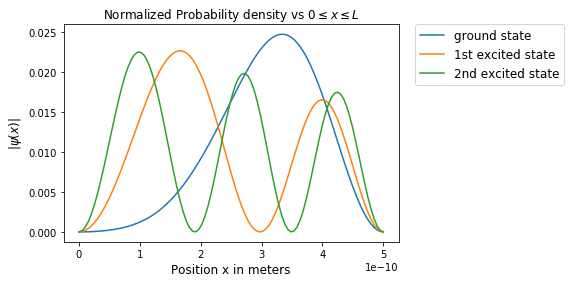

In [64]:
dens1 /= np.sum(dens1) #normalize
dens2 /= np.sum(dens2) #normalize
dens3 /= np.sum(dens3) #normalize
#plot normalzied probability densities 
plt.figure()
plt.title(\
'Normalized Probability density vs $0\leq x \leq L$',\
          fontsize = font)
plt.xlabel('Position x in meters',fontsize = font)
plt.ylabel('$|\psi(x)|$',fontsize = font)
plt.plot(x,dens1, label = 'ground state')
plt.plot(x,dens2, label = '1st excited state')
plt.plot(x,dens3, label = '2nd excited state')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2,\
        borderaxespad=0.,fontsize = font)